# Raster image

`Array raster`:  
  >grid of squares called pixels. Each pixel contains a number that determines its brightness. The basic range of numbers is 0 to 255 or 8 bits. Image model as  `numpy array`.

### Modules
3. `PIL` (pillow): the Python Imaging Library (PIL)} adds image processing capabilities to your Python interpreter. This library supports many file formats, and provides 
     powerful image processing and graphics capabilities: [PIL](http://www.pythonware.com/products/pil/)

4. `ipywidgets` [instaling jupyter-widgets](https://ipywidgets.readthedocs.io/en/latest/user_install.html#installing-in-jupyterlab-3-x)
  
## Create an image (by numpy array)
  - data type: `np.uint8`: numbers from 0 to 255
  - 2D array of shape: 10 rows by 10 columns
  - `np.random.randint(start,stop,shape)`:
    > the function generates a set of random integers from the range of `start` to `stop` in 
    > the form of an array with a given shape (number of rows, number of columns):   
    > `start = 0`, `stop = 256`, `shape = (10,10)`

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from PIL import Image
from ipywidgets import interact

In [2]:
np.random.seed(24)  # set seed, always the same results of randoming
ar = np.random.randint(0,255,(10,10),dtype=np.uint8)
print(ar)
print(f'\narray.shape: {ar.shape}\narray.dtype: {ar.dtype}')

[[162 177 195 245 131   3  96  75 192  56]
 [ 19 179  87 225 135  13 145  77 247 145]
 [232  70  81 129  84  86  56 100  25 228]
 [251 123  48 110  92 207  28  79 130   4]
 [ 56 102 189 239 175 132 201 227 184  23]
 [ 82 107  91 121 139  29 252  80 123 143]
 [100 158 227 149 244  34 115   7  78  70]
 [143 131  76  98 231 216  89 143  73 141]
 [ 13  82  18 231  50   5 119  91 205  93]
 [135 249  31 170 153 185 171 181 163 110]]

array.shape: (10, 10)
array.dtype: uint8


## Displaying the array as an image
   - `plt.imshow()` function
   - in the default colors of `matplotlib`
   - in gray colors [matplotlib color bars](https://matplotlib.org/stable/users/explain/colors/colormaps.html#colormaps)

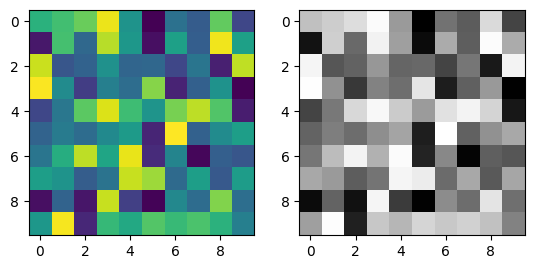

In [3]:
plt.subplot(1,2,1)
plt.imshow(ar)     # default colors of matplotlib
plt.subplot(1,2,2)
plt.imshow(ar, cmap=plt.cm.Greys_r); # gray colors

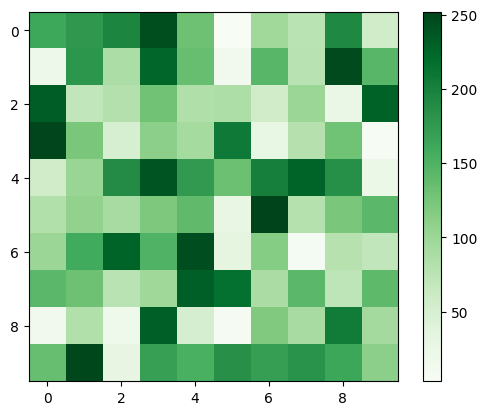

In [4]:
plt.imshow(ar, cmap=plt.cm.Greens)
plt.colorbar()

## Displaying histogram of the image
   - What is the histogram of the image?
   - `plt.hist()` function [hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist)

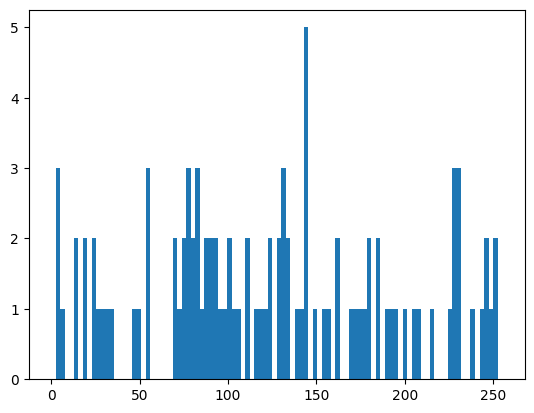

In [5]:
# try with different bins number and range
plt.hist(ar.ravel(), bins=100, range=(0,255));

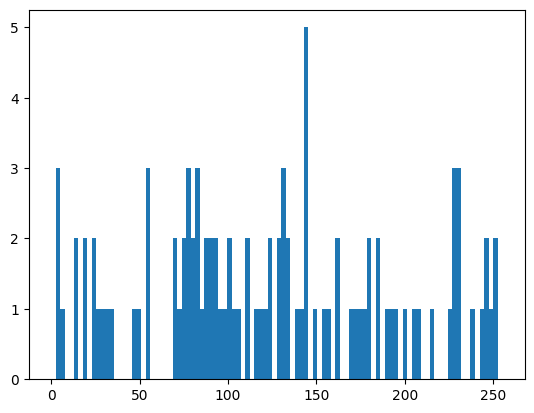

In [30]:
# plt.hist(ar.flatten(), bins=100, range=(0,255));
plt.hist(ar.reshape(-1), bins=100, range=(0,255));

Text(0.5, 1.0, '')

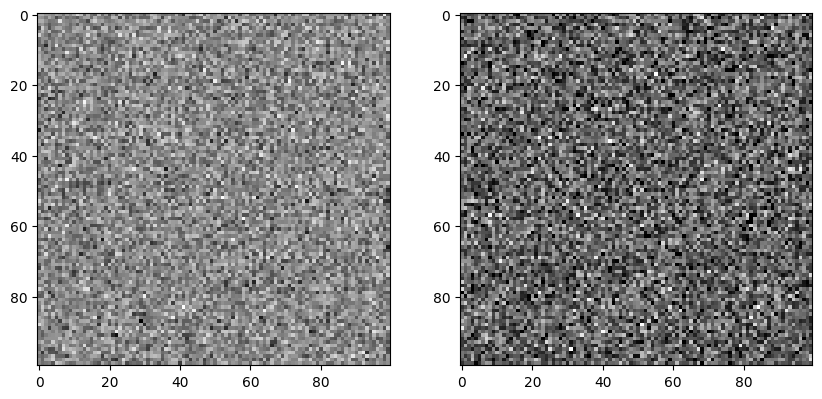

In [44]:
ar_normal = np.random.normal(loc=100, scale=10, size=(100,100))
ar_normal[ar_normal<0]=0
ar_normal[ar_normal>255]=255

ar_normal_150 = np.random.normal(loc=100, scale=50, size=(100,100))
ar_normal_150[ar_normal_150<0]=0
ar_normal_150[ar_normal_150>255]=255


plt.figure(figsize = (10,18))

ax1 = plt.subplot(1,2,1)
ax1.imshow(ar_normal)
ax1.set_title('')

ax2 = plt.subplot(1,2,2)
ax2.imshow(ar_normal_150)
ax2.set_title('')

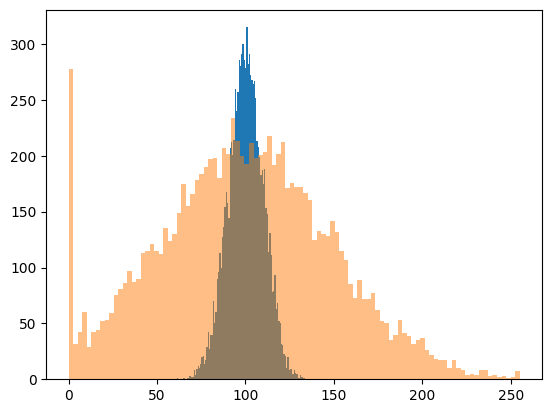

In [46]:
plt.hist(ar_normal.flatten(), bins=100);
plt.hist(ar_normal_150.flatten(), bins=100, alpha=0.5);

## Save image

In [7]:
im = Image.fromarray(ar)
im.save('test.jpg')

# Playing with spatial resolution

Creating 3 single-channel images with different shape:

 - 20 x 20 pixels
 - 50 x 50 pixels
 - 500 x 500 pixels

In [7]:
r20 =np.random.randint(0,255,(20,20),dtype=np.uint8)
r100 =np.random.randint(0,255,(100,100),dtype=np.uint8)
r500 =np.random.randint(0,255,(500,500),dtype=np.uint8)

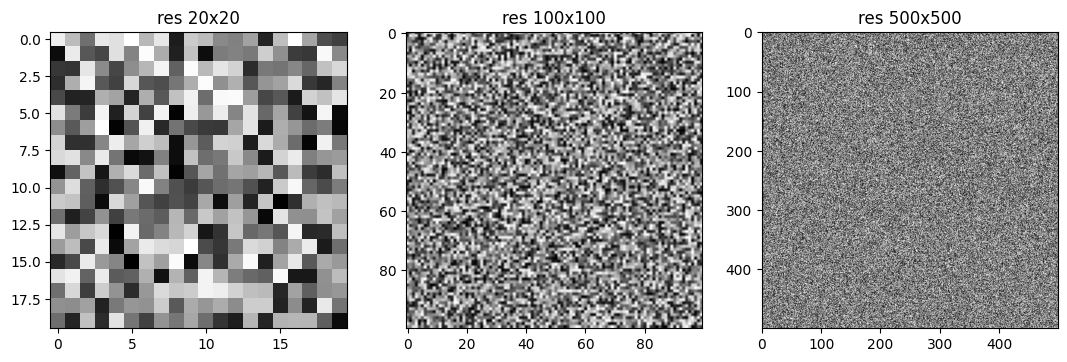

In [12]:
# list of image titles
tit = ['res 20x20','res 100x100','res 500x500']
f = plt.figure(figsize=(13,18))
plt.gray() # grayscale display mode

for i,img in enumerate([r20,r100,r500],1):
    plt.subplot(1,3,i)  # 2 images: one row, two columns, i - image number from 1
    plt.imshow(img)
    plt.title(tit[i-1])

In [31]:
def resolution_test(res: int):
    ar = np.random.randint(0, 255, (res, res), dtype=np.uint8)
    plt.imshow(ar, cmap='gray')

interact(resolution_test, res=(50, 500))

interactive(children=(IntSlider(value=275, description='res', max=500, min=50), Output()), _dom_classes=('widg…

<function __main__.resolution_test(res: int)>

# Import image 

Import image by PIL than convert it to np.array

Save image from np.array

<PIL.TiffImagePlugin.TiffImageFile image mode=L size=512x512 at 0x7F8F5F2F6D40>
(512, 512)


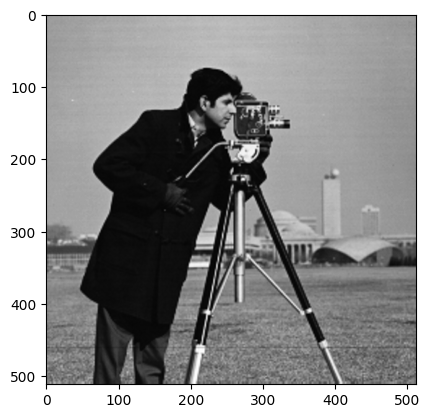

In [57]:
im = Image.open('/storage/Uczelnia/prowadzone/image_processing/img_processing/imgs/cameraman.tif')
print(im)
image = np.array(im)
print(image.shape)
plt.imshow(image, vmin=0, vmax=255)

# Image.fromarray(image).save('/storage/Uczelnia/prowadzone/image_processing/img_processing/imgs/cameraman1.jpeg')

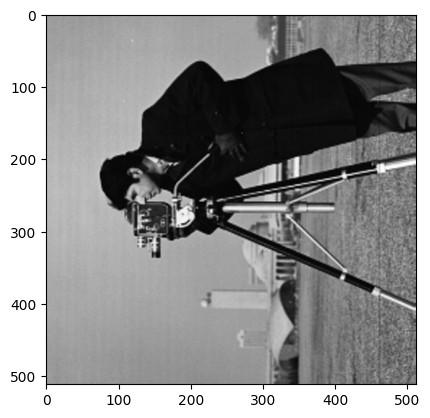

In [17]:
image_T = np.transpose(image)
plt.imshow(image_T)

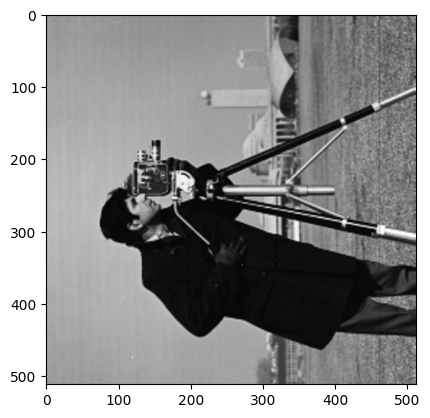

In [28]:
image_r90 = np.rot90(image, k=1)
plt.imshow(image_r90)

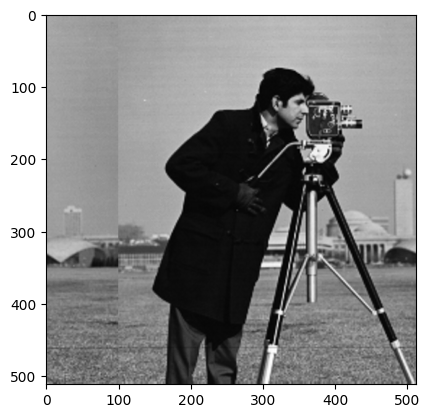

In [25]:
image_r = np.roll(image, shift=100)
plt.imshow(image_r)

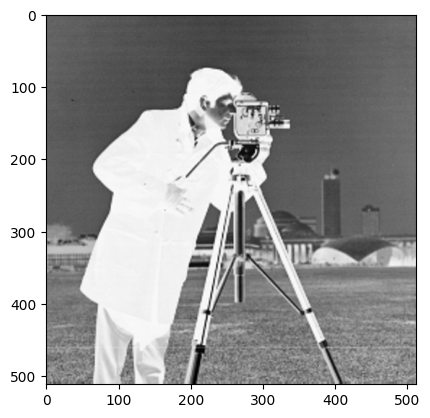

In [73]:
image_dop = 255 - image
plt.imshow(image_dop)

(512, 512)
(103, 103)


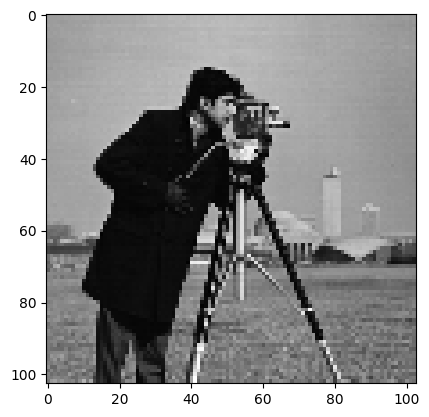

In [72]:
image_low = image[::5, ::5]
plt.imshow(image_low)
print(image.shape)
print(image_low.shape)

`Exercise:`
`Based on the given image:`
- `import image (could be by PIL) and convert to numpy array`
- `print basic information of the array`
- `show array by matplotlib in gray scale and one selected scale`
- `crop part of the image - could be face of the man, camera, building`
- `change values of the original image: if larger than 150 change to 0. Make copy to save original array`
- `subtract: original - changed`
- `make and compare histograms of the images - original, 0to150 and 150to255`
- `save two arrays as images: with 150=0 and subtract`
- `open and see how they look`


## Playing with `matplotlib`
`Display image+histogram in more handy way`

Text(0.5, 1.0, 'histogram of 150 to 255 image')

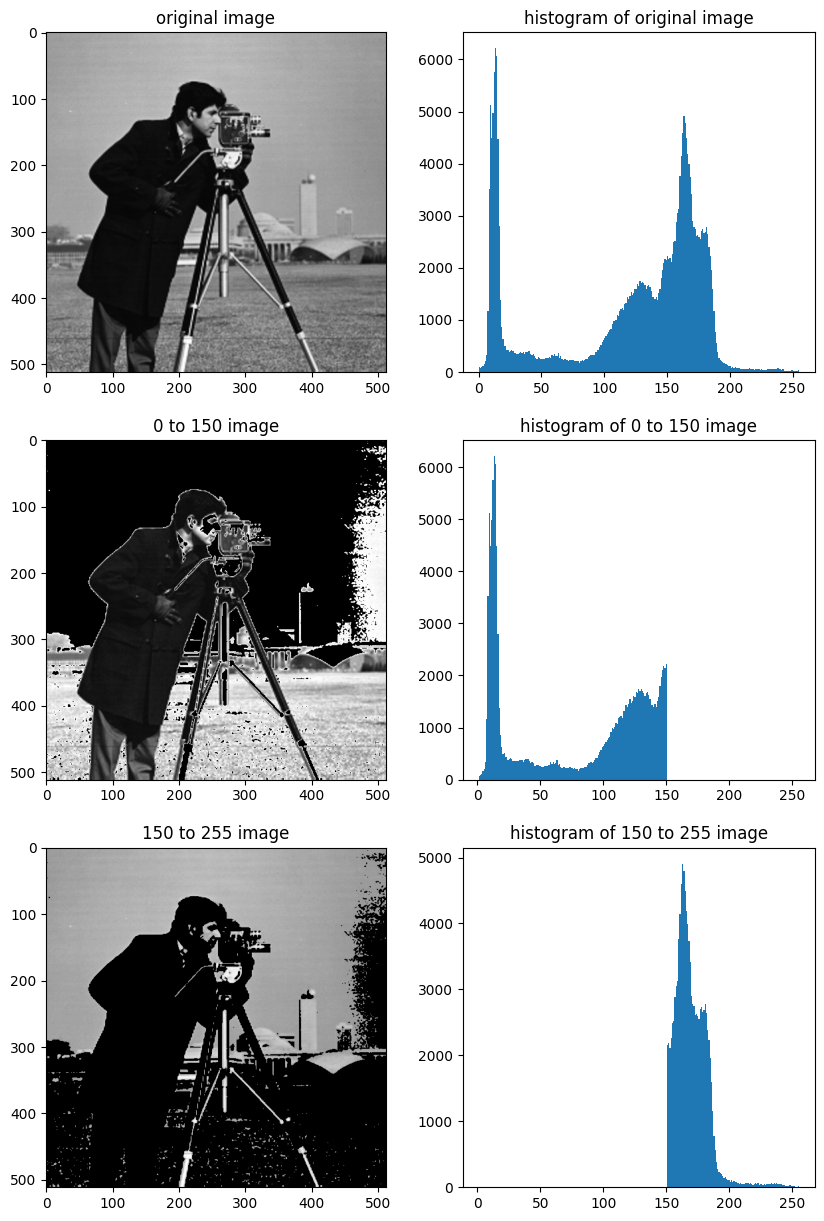